In [1]:
import sys
sys.path.append("/home/jovyan/work/Architectures_for_Big_Data/")
import pyspark
import re
import numpy as np
import matplotlib.pyplot as plt

sc = pyspark.SparkContext("local[3]")

In [ ]:
from dataGenerator.rowGenerator import *
from dataGenerator.datasetGenerator import *
from datetime import datetime
import numpy as np

dataset = datasetGenerator()
dataset.addGenerator(mioIdGenerator(),prefix="book",min=1,max=100,keyName="bookId",strategy=np.random.exponential)
dataset.addGenerator(idGenerator(),prefix="token",min=1,max=5000,keyName="tokenId")

bookTokens = sc.parallelize( dataset.generateDataset(250000)).persist()
bookTokens.first()

In [7]:
bookTokens.map(lambda x: x.get("bookId")).map(lambda x: re.search(r'\d+', x).group()).take(10)

['0074',
 '0079',
 '0088',
 '0001',
 '0031',
 '0045',
 '0090',
 '0007',
 '0069',
 '0043']

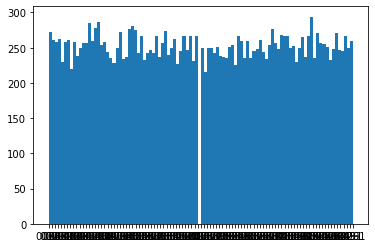

In [10]:
x = bookTokens.map(lambda x: x.get("bookId")).map(lambda x: re.search(r'\d+', x).group()).take(25000)
plt.hist(x, bins=100)
plt.show()

In [10]:
np.random.randint(0,10)

0

In [20]:
np.random.normal(0, 2, 1)[0]

-0.5152908234972657